In [1]:
import pandas as pd
import numpy as np

from nltk import word_tokenize
from nltk.corpus import stopwords
set(stopwords.words('english'))


from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from gensim.models import Word2Vec
import gensim

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Data Preparation

In [2]:
data = pd.read_csv('All_data.csv')

In [3]:
data.head()

,Unnamed: 0,rowHash,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,...,channelViewCount,nextHash,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge
0,0,0,Scp3JH3eVLw,Depeche Mode It's No Good,DANCA MUITO.,0,0,18,0,0,...,8251061,1.0,0,2,14,2012-03-28T18:01:31.000Z,3911,the best of Jay cutler Dorian Yates,2017,2008
1,1,1,wLqmkz6u8G4,the best of Jay cutler Dorian Yates,Jay cutler e Dorian Yates,14,2,3911,0,0,...,8251061,2.0,5,2,8,2010-08-23T16:12:50.000Z,3853,Iron Man Andy photos NO PAIN NO GAIN,2012,2008
2,2,2,nKMsh79uOcM,Iron Man Andy photos NO PAIN NO GAIN,Iron Man Andy muscle NO PAIN NO GAIN,8,2,3853,0,5,...,8251061,3.0,0,2,3,2010-05-17T10:15:48.000Z,1392,the mission SEVERINA,2010,2008
3,3,4,E--7XtuuqAg,Mooring Anchor Carry 120kg at Papar Strongestm...,Only manage 11 meters,0,0,56,0,0,...,123988,5.0,0,0,0,2016-10-10T15:01:02.000Z,74,Tire Flip 450kg at Papar Strongestman 2016,2016,2011
4,4,5,fdsppIOelPw,Tire Flip 450kg at Papar Strongestman 2016,450kg x 5 flips,0,0,74,0,0,...,123988,6.0,0,0,0,2016-10-10T14:59:15.000Z,46,Farmer Walk 125kg each hand at Papar Strongest...,2016,2011


In [4]:
g=data.groupby('Channel Id').mean()
g.head()

,Unnamed: 0,rowHash,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,subscriberCount,channelVideoCount,channelViewCount,nextHash,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevViewCount,PublishedYear,ChannelAge
Channel Id,,,,,,,,,,,,,,,,,
UC--w7fuSe0EKFKSnXS95Pyw,37279.5,43211.375000,6.916667,0.166667,877.083333,0.0,3.541667,385.0,74.0,69069.0,43212.375000,3.416667,0.166667,6.916667,886.125000,2011.833333,2008.0
UC-0CzRZeML8zw4pFTVDq65Q,62487.5,26163.388889,310.083333,5.972222,11012.472222,0.0,105.250000,231461.0,230.0,16319737.0,26164.388889,114.388889,5.888889,318.222222,11154.555556,2017.000000,2010.0
UC-23k9cNwahyW3UkncsWeXg,162.0,137306.000000,14.000000,0.000000,2805.000000,0.0,1.000000,18.0,1.0,2805.0,NaN,0.000000,0.000000,0.000000,0.000000,2013.000000,2012.0
UC-3FeOXwZjbyzTO1T6S1IEw,78446.0,55034.000000,13.529412,0.823529,6994.647059,0.0,0.764706,390.0,32.0,185641.0,55035.000000,1.000000,0.823529,13.764706,7218.294118,2009.588235,2008.0
UC-3o78pP-D_GrY312riQL4w,78013.0,87394.000000,3.909091,0.090909,677.545455,0.0,1.363636,74.0,15.0,11736.0,87395.000000,1.454545,0.090909,3.454545,781.363636,2011.272727,2010.0


In [5]:
data.Description.head()

0                            DANCA MUITO.
1               Jay cutler e Dorian Yates
2    Iron Man Andy muscle NO PAIN NO GAIN
3                   Only manage 11 meters
4                         450kg x 5 flips
Name: Description, dtype: object

In [6]:
data['description_tokenized'] = data.Description.apply(lambda x: word_tokenize(x))

In [7]:
stop_words = set(stopwords.words('english')) 


data['description_tokenized'] = data.description_tokenized.apply(lambda x: [i.lower() for i in x if not i in stop_words] )

In [8]:
data['title_tokenized'] = data.Title.apply(lambda x: word_tokenize(x))
data['title_tokenized'] = data.title_tokenized.apply(lambda x: [i.lower() for i in x if not i in stop_words])

In [9]:
data.title_tokenized.head()

0                    [depeche, mode, it, 's, no, good]
1                   [best, jay, cutler, dorian, yates]
2        [iron, man, andy, photos, no, pain, no, gain]
3    [mooring, anchor, carry, 120kg, papar, stronge...
4       [tire, flip, 450kg, papar, strongestman, 2016]
Name: title_tokenized, dtype: object

In [10]:
data.description_tokenized.head()

0                                [danca, muito, .]
1                  [jay, cutler, e, dorian, yates]
2    [iron, man, andy, muscle, no, pain, no, gain]
3                       [only, manage, 11, meters]
4                             [450kg, x, 5, flips]
Name: description_tokenized, dtype: object

In [11]:
data['description_tok_short'] = data.description_tokenized.apply(lambda x: x[:99] if len(x)>100 else x)

In [12]:
data['final_input'] = data.description_tok_short + data.title_tokenized

In [13]:
data.final_input.head()

0    [danca, muito, ., depeche, mode, it, 's, no, g...
1    [jay, cutler, e, dorian, yates, best, jay, cut...
2    [iron, man, andy, muscle, no, pain, no, gain, ...
3    [only, manage, 11, meters, mooring, anchor, ca...
4    [450kg, x, 5, flips, tire, flip, 450kg, papar,...
Name: final_input, dtype: object

In [14]:
model_wv = Word2Vec(data.description_tokenized, min_count=1, size=25)

In [15]:
model_wv_title = Word2Vec(data.final_input, min_count=1, size=25)

In [16]:
np.concatenate(model_wv[data.description_tokenized[0]])

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.02108838e-02, -1.37152188e-02, -2.32663006e-02, -8.39891005e-03,
       -2.26806495e-02, -1.99693199e-02,  7.71122053e-03, -1.98925957e-02,
        1.61926430e-02,  1.54729770e-03,  4.05245535e-02, -3.64596862e-03,
        2.19598748e-02,  1.59324054e-02,  3.40198576e-02,  9.11119394e-03,
        3.15484069e-02, -1.46661540e-02, -2.81412248e-03, -1.81660708e-02,
        2.45833746e-03,  1.36891054e-02,  3.71446870e-02, -5.14636971e-02,
        2.61807553e-02, -1.54954776e-01,  1.76529571e-01, -3.61527830e-01,
        6.78441525e-02, -4.15270925e-01, -2.90213525e-01,  1.48167968e-01,
       -3.48596185e-01,  4.24469948e-01, -5.69826029e-02,  4.11323637e-01,
        2.95393402e-03, -1.62958950e-01,  2.16035098e-01,  3.30571532e-01,
        1.68979108e-01,  1.27407402e-01, -2.35244021e-01,  1.07766993e-01,
       -1.40869752e-01,  1.02702096e-01,  4.37351763e-02,  5.32204270e-01,
       -2.99132615e-01,  1.29945755e-01, -2.25508237e+00, -2.73343062e+00,
       -1.94561377e-01,  

In [17]:
data['target'] = data.ViewCount.apply(lambda x: np.log(x))
print(len(data))
data = data[data.target>=0]
print(len(data))

92458
92396


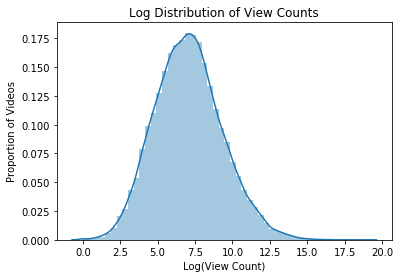

In [19]:
from pylab import savefig
sns.distplot(data.target)
plt.title('Log Distribution of View Counts')
plt.xlabel('Log(View Count)')
plt.ylabel('Proportion of Videos')
plt.savefig('view_distribtion.png', dpi=800)
plt.show()

In [22]:
train, test = train_test_split(data,test_size=0.2)

# Linear Regression - Description

In [29]:
from sklearn.linear_model import LinearRegression


text_clf = Pipeline([('vect', CountVectorizer(max_df= 0.75, max_features= None, ngram_range= (1, 2))),
                      ('tfidf', TfidfTransformer(norm= 'l2', use_idf= False)),
                      ('clf', LinearRegression())])
                    
text_clf.fit(train['Description'],train['target'])

y_pred = text_clf.predict(test['Description'])


In [30]:
test['baseline_lregression'] = y_pred
test[['Description', 'target', 'baseline_lregression']].to_csv('baseline_results.csv', index=False)

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
rmse = sqrt(mean_squared_error(test.target, y_pred))
rmse

1.9357857015724864

# Linear Regression - Description + Title

In [370]:
train['description_title'] = train['Description'] +' '+ train['Title']
test['description_title'] = test['Description'] + ' ' + test['Title']

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [369]:
# train.description_title

In [371]:
text_clf = Pipeline([('vect', CountVectorizer(max_df= 0.75, max_features= None, ngram_range= (1, 2))),
                      ('tfidf', TfidfTransformer(norm= 'l2', use_idf= False)),
                      ('clf', LinearRegression())])
                    
text_clf.fit(train['description_title'],train['target'])

y_pred = text_clf.predict(test['description_title'])

In [372]:
rmse = sqrt(mean_squared_error(test.target, y_pred))
rmse

1.864988625532717

# LSTM - Description

In [232]:
train_X = []
train_Y = []
for x,y in zip(train['description_tok_short'],train['target']):
    try:
        o = np.concatenate((np.concatenate(model_wv[x[:25]]), ([0]*25*(25-len(x))))).astype('float32')
        train_X.append(o)
        train_Y.append(y)
    except ValueError:
        pass
#         o = np.zeros(625).astype('float32')
#         test_X.append(o)

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [234]:
test_X = []
test_Y = []
for x,y in zip(test['description_tok_short'],test['target']):
    try:
        o = np.concatenate((np.concatenate(model_wv[x[:25]]), ([0]*25*(25-len(x))))).astype('float32')
        test_X.append(o)
        test_Y.append(y)
    except ValueError:
        pass
#         o = np.zeros(625).astype('float32')
#         test_X.append(o)

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [245]:
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.output_dim = output_dim
        self.batch_size = batch_size

        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, batch_first=False, dropout=0.5)

        self.linear = nn.Linear(self.hidden_dim, 1)
  

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):

         
        lstm_out, self.hidden = self.lstm(x.view(len(x), self.batch_size, -1))     
        
        
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))        
        return y_pred.view(-1)

model = LSTM(625, 100, len(train_X))

In [246]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

LSTM(
  (lstm): LSTM(625, 100, num_layers=2, dropout=0.5)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [272]:
loss_fn = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.Adam(model.parameters(), lr=.01)

num_epochs = 200

# Train model

hist = np.zeros(num_epochs)

for t in range(num_epochs):
    
        
    # Clear stored gradient
    model.zero_grad()

    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()

    X_train = torch.tensor(train_X).view(1,len(train_X),625).to(device)
    Y_train = torch.tensor(train_Y).to(device)

    # Forward pass
    y_pred = model.forward(X_train)

    loss = loss_fn(y_pred, Y_train)
    if t % 5 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()



    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()
        
    if t % 5 ==0:
        # save model
        save_dir = 'C:\\Users\\acbar\\Desktop\\Winter19\\SI630\\Project\\'
        save_file = os.path.join(save_dir, '%s-epoch-%d.mdl' % ('lstm1', t))
        print('Saving current state of model to %s' % save_file)
        torch.save(model, save_file)
    
#     print(hist)

Epoch  0 MSE:  226998.765625
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-0.mdl


c:\users\acbar\anaconda3\envs\si618\lib\site-packages\torch\serialization.py:251: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch  5 MSE:  233918.625
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-5.mdl
Epoch  10 MSE:  211946.296875
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-10.mdl
Epoch  15 MSE:  201327.046875
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-15.mdl
Epoch  20 MSE:  188811.71875
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-20.mdl
Epoch  25 MSE:  176902.203125
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-25.mdl
Epoch  30 MSE:  163982.921875
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-30.mdl
Epoch  35 MSE:  150796.671875
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm3-epoch-35.mdl
Epoch  40 MSE:  140684.453125
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\l

KeyboardInterrupt: 

In [248]:
r=len(train_X)-len(test_X)
for i in range(r):
    test_X.append([0]*625)

In [249]:
for i in range(r):
    test_Y.append(0)

In [250]:
len(test_X)==len(train_X)

True

In [251]:
X_test = torch.tensor(test_X).view(1,len(test_X),625).to(device)
Y_test = torch.tensor(test_Y).to(device)

In [304]:
model = torch.load('lstm1-epoch-125.mdl')
model.eval()


# X_test = torch.tensor(test_X).view(len(train_X),1,625).to(device)
# Y_test = torch.tensor(train_Y).to(device)

output = model(X_test)

In [305]:
output=output.detach().numpy()

In [379]:
rmse_test = sqrt(mean_squared_error(output[:len(test)], test_Y[:len(test)]))
rmse_test

2.0294824901235833

# LSTM - Description + Title

In [313]:
train_X = []
train_Y = []
for x,y in zip(train['final_input'],train['target']):
    try:
        o = np.concatenate((np.concatenate(model_wv[x[:25]]), ([0]*25*(25-len(x)))) ).astype('float32')
        train_X.append(o)
        train_Y.append(y)
    except KeyError:
        pass

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [314]:
d=test['description_tok_short']


In [315]:
test_X = []
test_Y = []
for x,y in zip(test['final_input'],test['target']):
    try:
        o = np.concatenate((np.concatenate(model_wv[x[:25]]), ([0]*25*(25-len(x)))) ).astype('float32')
        test_X.append(o)
        test_Y.append(y)
    except KeyError:
        pass

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [316]:
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1, num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.output_dim = output_dim
        self.batch_size = batch_size

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, batch_first=False, dropout=0.5)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, 1)
  

    def init_hidden(self):
#         This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
         
        lstm_out, self.hidden = self.lstm(x.view(len(x), self.batch_size, -1))     
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))        
        return y_pred.view(-1)

model = LSTM(625, 100, len(train_X))

In [317]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

LSTM(
  (lstm): LSTM(625, 100, num_layers=2, dropout=0.5)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [318]:
loss_fn = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.Adam(model.parameters(), lr=.01)

num_epochs = 200

# Train model

hist = np.zeros(num_epochs)

for t in range(num_epochs):
    
        
    # Clear stored gradient
    model.zero_grad()

    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()

    X_train = torch.tensor(train_X).view(1,len(train_X),625).to(device)
    Y_train = torch.tensor(train_Y).to(device)

    # Forward pass
    y_pred = model.forward(X_train)

    loss = loss_fn(y_pred, Y_train)
    if t % 5 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()



    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()
        
    if t % 5 ==0:
        # save model
        save_dir = 'C:\\Users\\acbar\\Desktop\\Winter19\\SI630\\Project\\'
        save_file = os.path.join(save_dir, '%s-epoch-%d.mdl' % ('lstm2', t))
        print('Saving current state of model to %s' % save_file)
        torch.save(model, save_file)
    
#     print(hist)

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch  0 MSE:  3907463.25
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-0.mdl


c:\users\acbar\anaconda3\envs\si618\lib\site-packages\torch\serialization.py:251: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch  5 MSE:  1269389.75
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-5.mdl
Epoch  10 MSE:  432168.3125
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-10.mdl
Epoch  15 MSE:  567473.5
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-15.mdl
Epoch  20 MSE:  350075.59375
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-20.mdl
Epoch  25 MSE:  401820.5
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-25.mdl
Epoch  30 MSE:  377819.375
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-30.mdl
Epoch  35 MSE:  348567.5625
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-35.mdl
Epoch  40 MSE:  363622.125
Saving current state of model to C:\Users\acbar\Desktop\Winter19\SI630\Project\lstm2-epoch-40.mdl
Ep

In [319]:
r=len(train_X)-len(test_X)
for i in range(r):
    test_X.append([0]*625)


In [320]:
for i in range(r):
    test_Y.append(0)

In [321]:
len(test_X)==len(train_X)

True

In [322]:
X_test = torch.tensor(test_X).view(1,len(test_X),625).to(device)
Y_test = torch.tensor(test_Y).to(device)

In [365]:
model = torch.load('lstm2-epoch-145.mdl')
model.eval()


# X_test = torch.tensor(test_X).view(len(train_X),1,625).to(device)
# Y_test = torch.tensor(train_Y).to(device)

output = model(X_test)


In [366]:
output=output.detach().numpy()

In [378]:
rmse_test = sqrt(mean_squared_error(output[:len(test)], test_Y[:len(test)]))
rmse_test

1.1323452378943275

In [368]:
p = []
for x,y in zip(output, test_Y):
    p.append((x,y))


In [ ]:
# sns.scatterplot(output, test_Y)
# plt.lineplot(test_Y, test_Y)
# plt.title('Predictions versus True Values')
# plt.xlabel('Predictions')
# plt.ylabel('True Values')
# plt.savefig('predictions_true.png', dpi=800)

# Baseline - Median View Count by YouTube Channel

In [27]:
g=test.groupby('Channel Id').median()
base= test['Channel Id'].apply(lambda x: g.target[x])

In [28]:
rmse_base = sqrt(mean_squared_error(base, test.target))
rmse_base

1.171649344148862

c:\users\acbar\anaconda3\envs\si618\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


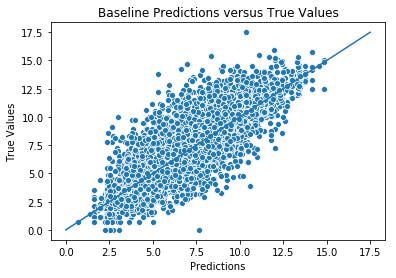

In [29]:
sns.scatterplot(base, test.target)
sns.lineplot(test.target, test.target)
plt.title('Baseline Predictions versus True Values')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.savefig('baseline_graph.png', dpi=800)